In [ ]:
import pandas as pd

# Load the Excel fileee
file_path = 'medical_cleand603task3.xlsx' 
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

   Day   Revenue
0    1  0.000000
1    2 -0.292356
2    3 -0.327772
3    4 -0.339987
4    5 -0.124888


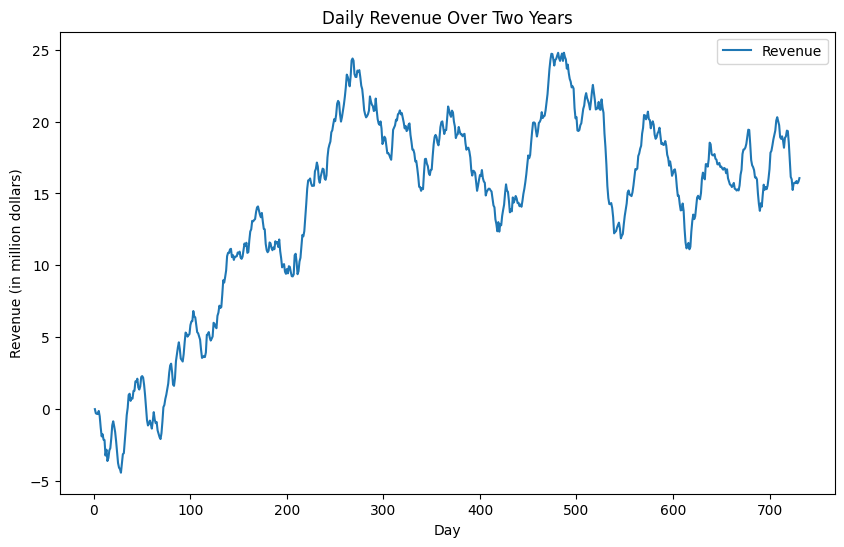

Day
1.0    730
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Day'], data['Revenue'], label='Revenue')
plt.title('Daily Revenue Over Two Years')
plt.xlabel('Day')
plt.ylabel('Revenue (in million dollars)')
plt.legend()
plt.show()

print(data['Day'].diff().value_counts())

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Revenue'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.2183190476089485
p-value: 0.19966400615064228


In [ ]:
data['Revenue'].fillna(method='ffill', inplace=True)


C:\Users\warre\AppData\Local\Temp\ipykernel_9024\792610266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Revenue'].fillna(method='ffill', inplace=True)
C:\Users\warre\AppData\Local\Temp\ipykernel_9024\792610266.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Revenue'].fillna(method='ffill', inplace=True)


In [13]:
train = data.iloc[:-30]  # First 701 days
test = data.iloc[-30:]  # Last 30 days

In [ ]:
data.to_csv('d603task3_cleaned_data.csv', index=False)

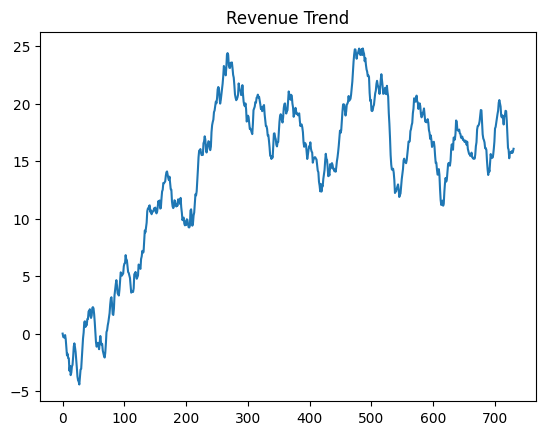

In [ ]:
plt.plot(data['Revenue'])
plt.title('Revenue Trend')
plt.show()

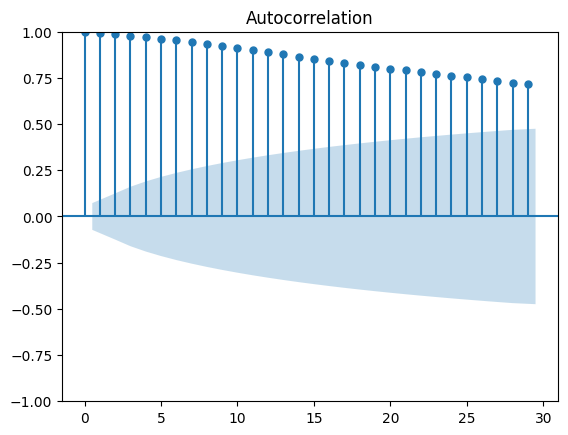

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Revenue'])
plt.show()

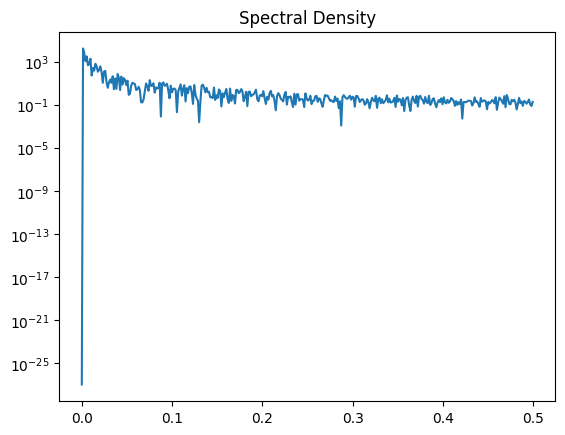

In [ ]:
from scipy.signal import periodogram
freqs, psd = periodogram(data['Revenue'])
plt.semilogy(freqs, psd)
plt.title('Spectral Density')
plt.show()

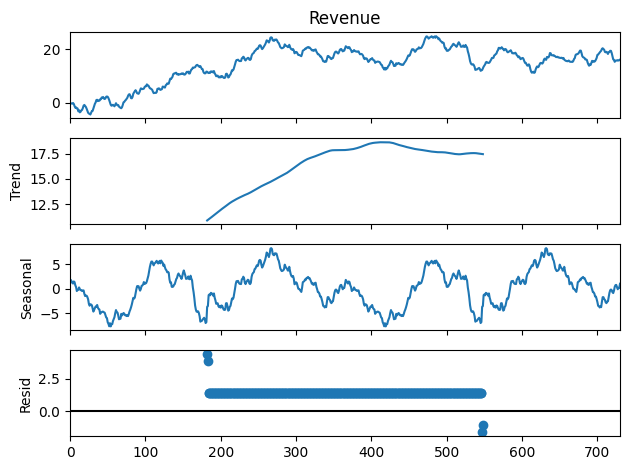

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Revenue'], period=365)
decomposition.plot()
plt.show()

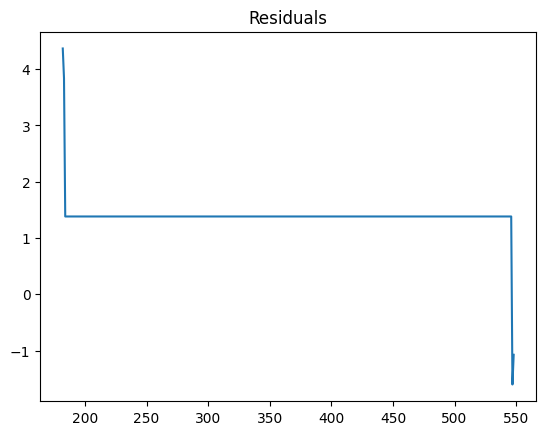

In [ ]:
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.show()

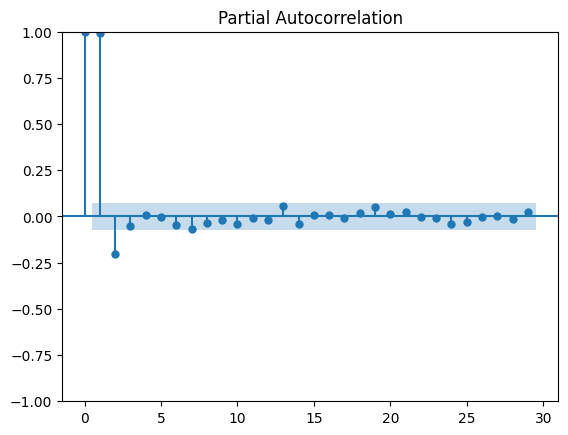

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Revenue'])
plt.show()

ADF Statistic: -2.2183190476089485
p-value: 0.19966400615064228
The series is non-stationary. Differencing is required.


<Figure size 1000x600 with 0 Axes>

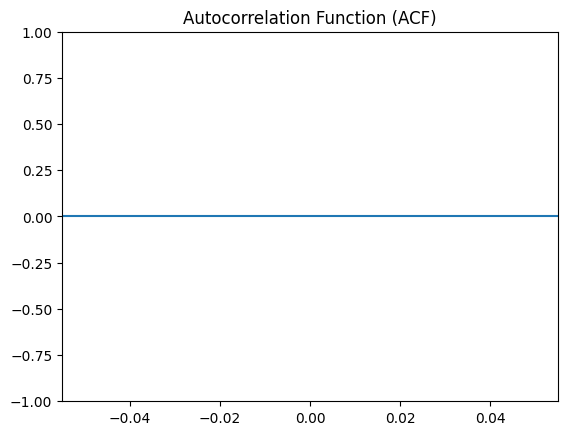

<Figure size 1000x600 with 0 Axes>

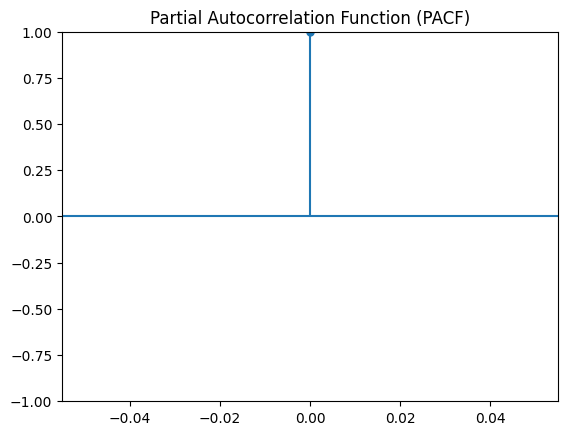

Suggested d value: 1


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Step 1: Perform the ADF test to determine stationarity
result = adfuller(data['Revenue'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("The series is non-stationary. Differencing is required.")
    data['Revenue_diff'] = data['Revenue'].diff().dropna()
    d = 1  # First differencing
else:
    print("The series is stationary. No differencing is required.")
    d = 0

# Step 2: Plot ACF and PACF to determine p and q
plt.figure(figsize=(10, 6))
plot_acf(data['Revenue_diff'] if d == 1 else data['Revenue'], lags=40)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data['Revenue_diff'] if d == 1 else data['Revenue'], lags=40)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

print(f"Suggested d value: {d}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(train['Revenue'], order=(2, 1, 1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Revenue'], forecast)
print("Mean Absolute Error (MAE):", mae)

from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['Revenue'], forecast))
print("Root Mean Squared Error (RMSE):", rmse)

C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  701
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -418.948
Date:                Fri, 02 May 2025   AIC                            845.897
Time:                        00:29:24   BIC                            864.101
Sample:                             0   HQIC                           852.934
                                - 701                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3571      0.284     -1.259      0.208      -0.913       0.199
ar.L2          0.3489      0.108      3.224      0.001       0.137       0.561
ma.L1          0.7591      0.289      2.624      0.0

In [ ]:
forecast = model_fit.forecast(steps=30)
print(forecast)

701    18.320402
702    18.547259
703    18.634758
704    18.682664
705    18.696086
706    18.708007
707    18.708433
708    18.712440
709    18.711158
710    18.713014
711    18.711904
712    18.712948
713    18.712188
714    18.712823
715    18.712331
716    18.712729
717    18.712415
718    18.712666
719    18.712467
720    18.712625
721    18.712499
722    18.712600
723    18.712520
724    18.712583
725    18.712533
726    18.712573
727    18.712541
728    18.712567
729    18.712546
730    18.712562
Name: predicted_mean, dtype: float64


In [ ]:
forecast.to_csv('d603task3_forecast.csv', index=False)

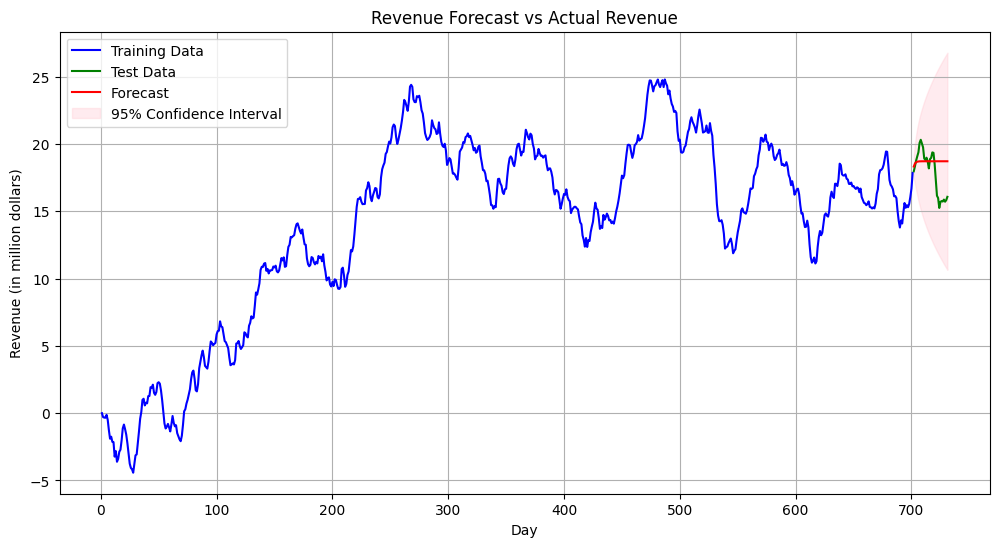

In [ ]:
import matplotlib.pyplot as plt

# Generate confidence intervals
forecast_mean = forecast
forecast_std = model_fit.get_forecast(steps=30).se_mean  # Standard errors for the forecast
lower_bound = forecast_mean - 1.96 * forecast_std
upper_bound = forecast_mean + 1.96 * forecast_std

# Ensure alignment of test days
test_days = test['Day'].reset_index(drop=True)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['Day'], train['Revenue'], label='Training Data', color='blue')

# Plot the test data
plt.plot(test_days, test['Revenue'].reset_index(drop=True), label='Test Data', color='green')

# Plot the forecast
plt.plot(test_days, forecast_mean, label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_days, lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Revenue Forecast vs Actual Revenue')
plt.xlabel('Day')
plt.ylabel('Revenue (in million dollars)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


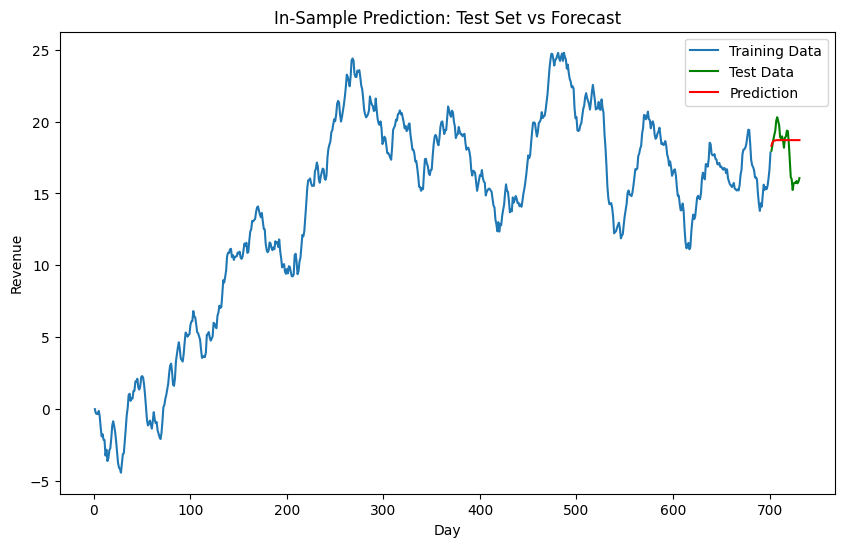

Test Set RMSE: 1.7945237275339514


In [8]:
# Split the data into training and test sets
train = data.iloc[:-30]  # First 701 days
test = data.iloc[-30:]   # Last 30 days

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA on training data
model = ARIMA(train['Revenue'], order=(2, 1, 1))  # Use your selected order
model_fit = model.fit()

# Forecast for the test set period
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs predicted for the test set
plt.figure(figsize=(10, 6))
plt.plot(train['Day'], train['Revenue'], label='Training Data')
plt.plot(test['Day'], test['Revenue'], label='Test Data', color='green')
plt.plot(test['Day'], forecast, label='Prediction', color='red')
plt.title('In-Sample Prediction: Test Set vs Forecast')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Report RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['Revenue'], forecast))
print("Test Set RMSE:", rmse)

C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


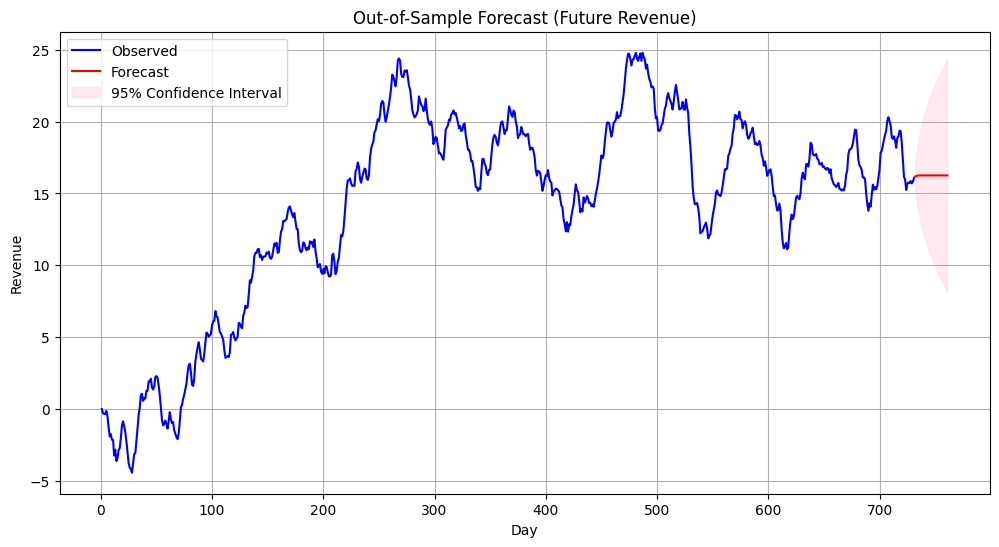

In [9]:
# Retrain ARIMA on all data
full_model = ARIMA(data['Revenue'], order=(2, 1, 1))
full_model_fit = full_model.fit()

# Forecast the next 30 days
n_forecast = 30
forecast_result = full_model_fit.get_forecast(steps=n_forecast)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval

# Create future day index
last_day = data['Day'].iloc[-1]
future_days = range(last_day + 1, last_day + n_forecast + 1)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Day'], data['Revenue'], label='Observed', color='blue')
plt.plot(future_days, forecast_mean, label='Forecast', color='red')
plt.fill_between(future_days, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Out-of-Sample Forecast (Future Revenue)')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

In [12]:
model = ARIMA(train['Revenue'], order=(2, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

full_model = ARIMA(data['Revenue'], order=(2, 1, 1))
full_model_fit = full_model.fit()
forecast_result = full_model_fit.get_forecast(steps=30)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int(alpha=0.05)

C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\warre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting aut